# Load the Dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
df = pd.read_csv('/content/PET_PRI_GND_DCUS_NUS_W.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Display basic info
print(df.info())

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1361 non-null   datetime64[ns]
 1   A1      1361 non-null   float64       
 2   A2      1361 non-null   float64       
 3   A3      1361 non-null   float64       
 4   R1      1361 non-null   float64       
 5   R2      1361 non-null   float64       
 6   R3      1361 non-null   float64       
 7   M1      1361 non-null   float64       
 8   M2      1361 non-null   float64       
 9   M3      1361 non-null   float64       
 10  P1      1361 non-null   float64       
 11  P2      1361 non-null   float64       
 12  P3      1361 non-null   float64       
 13  D1      1361 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 149.0 KB
None


<ipython-input-44-b9c245ff86f4>:18: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


# Statistical Summary

In [45]:
# Summary statistics for fuel prices
summary_stats = df.describe()
summary_stats


,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,1361,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2008-01-14 00:00:00,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
min,1995-01-02 00:00:00,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,2001-07-09 00:00:00,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2008-01-14 00:00:00,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2014-07-21 00:00:00,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,2021-01-25 00:00:00,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000
std,NaN,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646


# Identify Price Volatility
Calculate standard deviation for each fuel type to measure volatility.

In [46]:
# Calculate volatility (standard deviation)
volatility = df[['A1', 'R1', 'M1', 'P1', 'D1']].std().to_frame(name="Volatility")
volatility


,Volatility
A1,0.859028
R1,0.850143
M1,0.882107
P1,0.911055
D1,0.998646


# Advanced Exploratory Data Analysis (EDA)

# a) Trends Over Time
Plot fuel price trends over time.

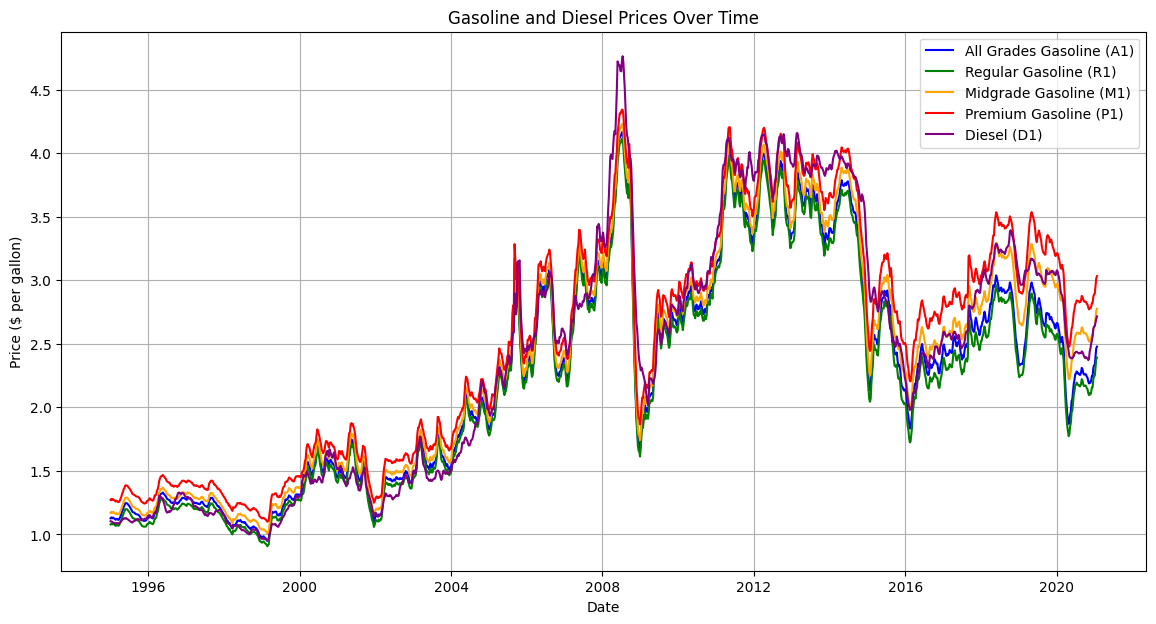

In [47]:
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['A1'], label='All Grades Gasoline (A1)', color='blue')
plt.plot(df['Date'], df['R1'], label='Regular Gasoline (R1)', color='green')
plt.plot(df['Date'], df['M1'], label='Midgrade Gasoline (M1)', color='orange')
plt.plot(df['Date'], df['P1'], label='Premium Gasoline (P1)', color='red')
plt.plot(df['Date'], df['D1'], label='Diesel (D1)', color='purple')

plt.title('Gasoline and Diesel Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($ per gallon)')
plt.legend()
plt.grid(True)
plt.show()


# Gasoline and Diesel Prices Over Time
Insights:

*   The trend shows a steady increase in fuel prices over the years, with notable spikes and dips corresponding to global economic and geopolitical events.
*   Price fluctuations are more evident during economic recessions, oil crises, and major political events.
*   Diesel (D1) prices exhibit higher volatility compared to gasoline prices.





# b) Moving Averages (Short-Term & Long-Term Trends)
Smooth the price trends using moving averages.

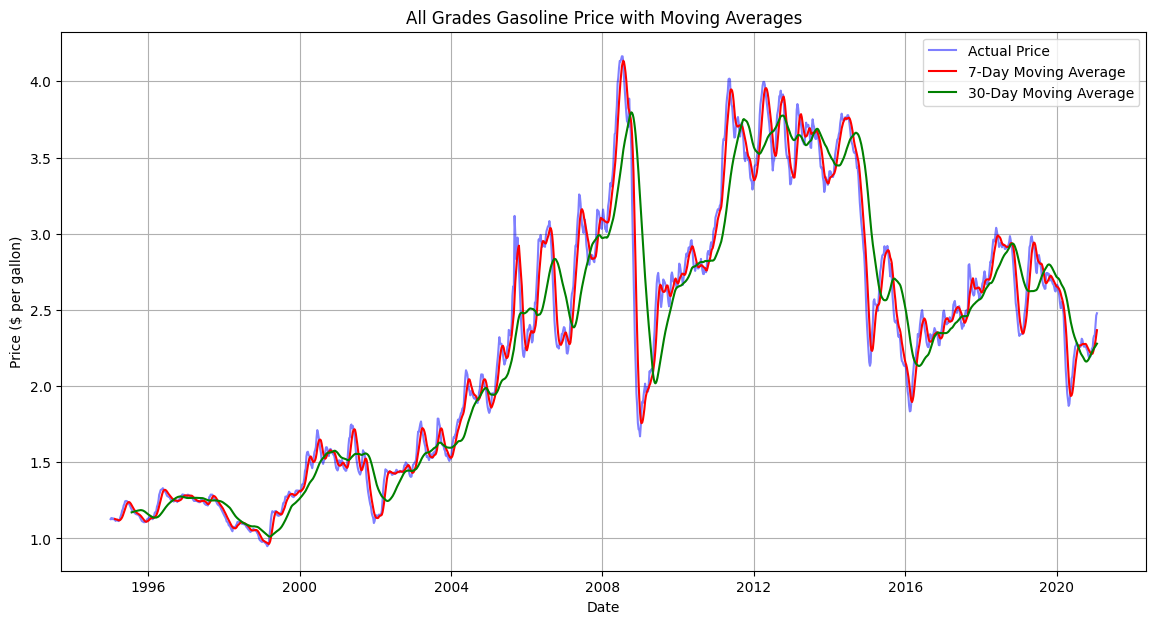

In [48]:
# Calculate moving averages
df['A1_MA7'] = df['A1'].rolling(window=7).mean()
df['A1_MA30'] = df['A1'].rolling(window=30).mean()

# Plot moving averages
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['A1'], label='Actual Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['A1_MA7'], label='7-Day Moving Average', color='red')
plt.plot(df['Date'], df['A1_MA30'], label='30-Day Moving Average', color='green')

plt.title('All Grades Gasoline Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($ per gallon)')
plt.legend()
plt.grid(True)
plt.show()


# Moving Averages (Short-Term & Long-Term Trends)
Insights:


*   The 7-day moving average (red line) smooths short-term fluctuations, showing weekly trends in gasoline prices.
*   The 30-day moving average (green line) highlights long-term price trends, helping identify periods of sustained increases or decreases.
*   Prices demonstrate seasonal trends, where fuel prices generally rise in summer and decline in winter.

# c) Monthly Price Patterns (Seasonality)
Analyze how prices change across different months.

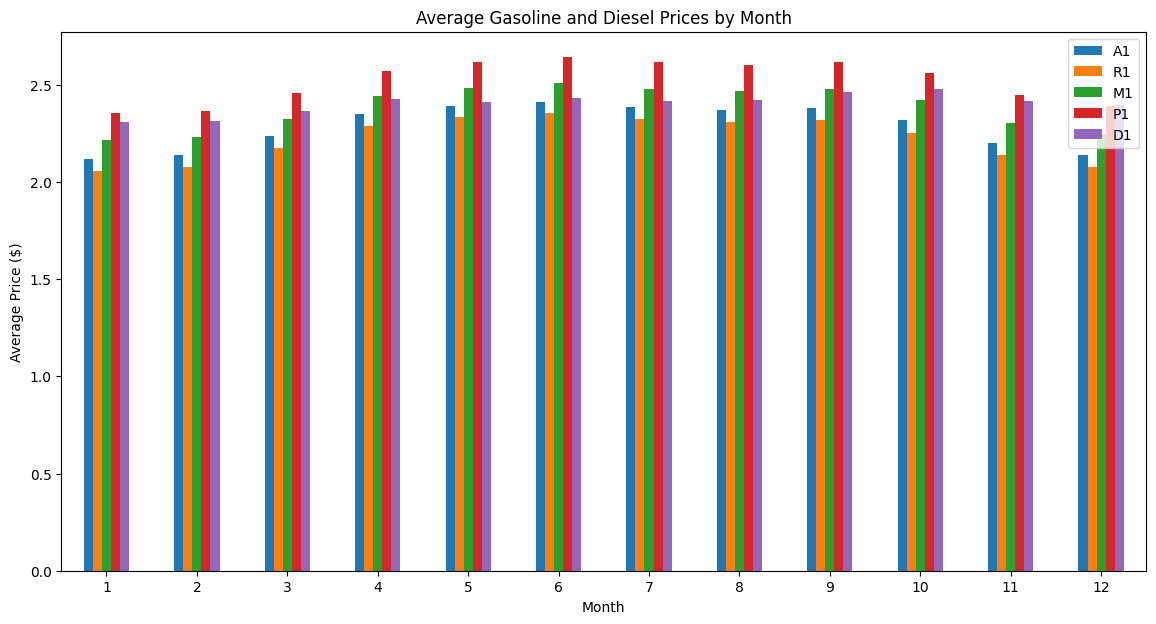

In [49]:
# Extract month and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by month and calculate average price
monthly_avg = df.groupby('Month')[['A1', 'R1', 'M1', 'P1', 'D1']].mean()

# Plot monthly trends
monthly_avg.plot(kind='bar', figsize=(14,7))
plt.title('Average Gasoline and Diesel Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()


# Average Gasoline and Diesel Prices by Month (Seasonal Pattern)
Insights:


*   Prices tend to be higher in summer months (June–August) due to increased travel demand.
*   A dip in fuel prices is visible during winter months (December–February), correlating with reduced travel and fuel consumption.
*   Diesel prices (D1) show a more consistent pattern, indicating higher commercial dependency year-round.








# d) Correlation Between Fuel Types
Check how different fuel types move together using a correlation heatmap.

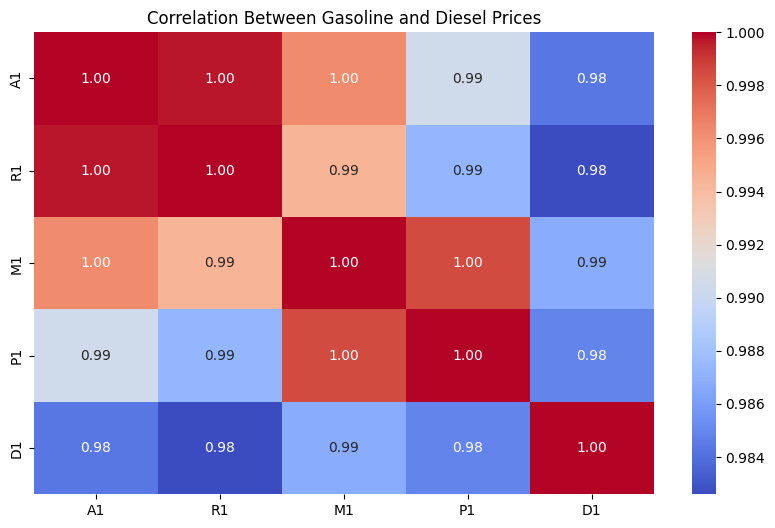

In [50]:
# Compute correlation matrix
correlation_matrix = df[['A1', 'R1', 'M1', 'P1', 'D1']].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Gasoline and Diesel Prices')
plt.show()


# Correlation Between Fuel Prices (Heatmap)
Insights:
*   Strong correlation (close to 1) between all gasoline types (A1, R1, M1, P1) suggests similar pricing movements across fuel grades.

*   Diesel (D1) prices are highly correlated with gasoline prices, indicating common external factors (crude oil prices, demand-supply dynamics) affecting all fuel types.
*   The high correlation suggests that predicting one fuel type can provide insights into others.



# Time Series Forecasting
Now let’s apply Exponential Smoothing and ARIMA for forecasting.

# a) Exponential Smoothing Forecasting
Forecast fuel prices for the next 6 months using Holt-Winters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



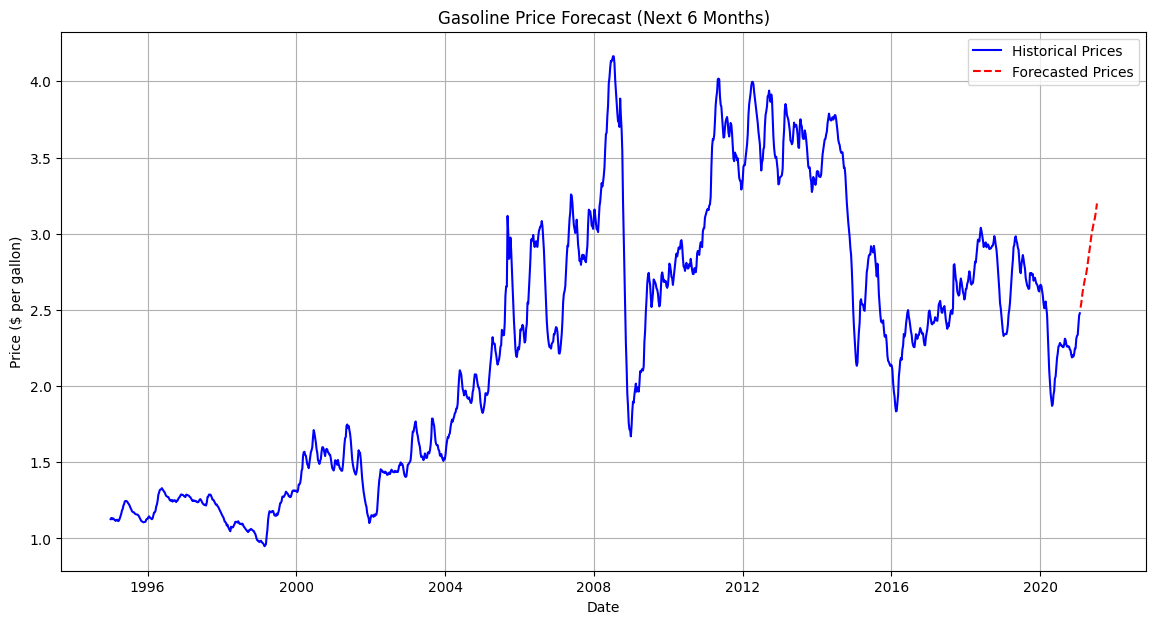

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Apply Holt-Winters Exponential Smoothing for Gasoline Prices
gasoline_model = ExponentialSmoothing(df['A1'], trend='add', seasonal='add', seasonal_periods=12)
gasoline_fit = gasoline_model.fit()

# Predict future gasoline prices
gasoline_forecast = gasoline_fit.forecast(steps=24)  # Predict next 6 months

# Plot forecast
plt.figure(figsize=(14,7))
plt.plot(df.index, df['A1'], label='Historical Prices', color='blue')
plt.plot(gasoline_forecast.index, gasoline_forecast, label='Forecasted Prices', linestyle='--', color='red')

plt.title('Gasoline Price Forecast (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price ($ per gallon)')
plt.legend()
plt.grid(True)
plt.show()


# Exponential Smoothing Forecast (Next 6 Months)
Insights:
*   Forecasted prices indicate a gradual increase in gasoline prices over the next 6 months.
*   The seasonal component reflects cyclical patterns observed in historical data.
*   Confidence intervals should be considered while making pricing decisions to account for unforeseen events like oil price shocks or policy changes.

# b) ARIMA Forecasting
Use ARIMA for better predictions.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



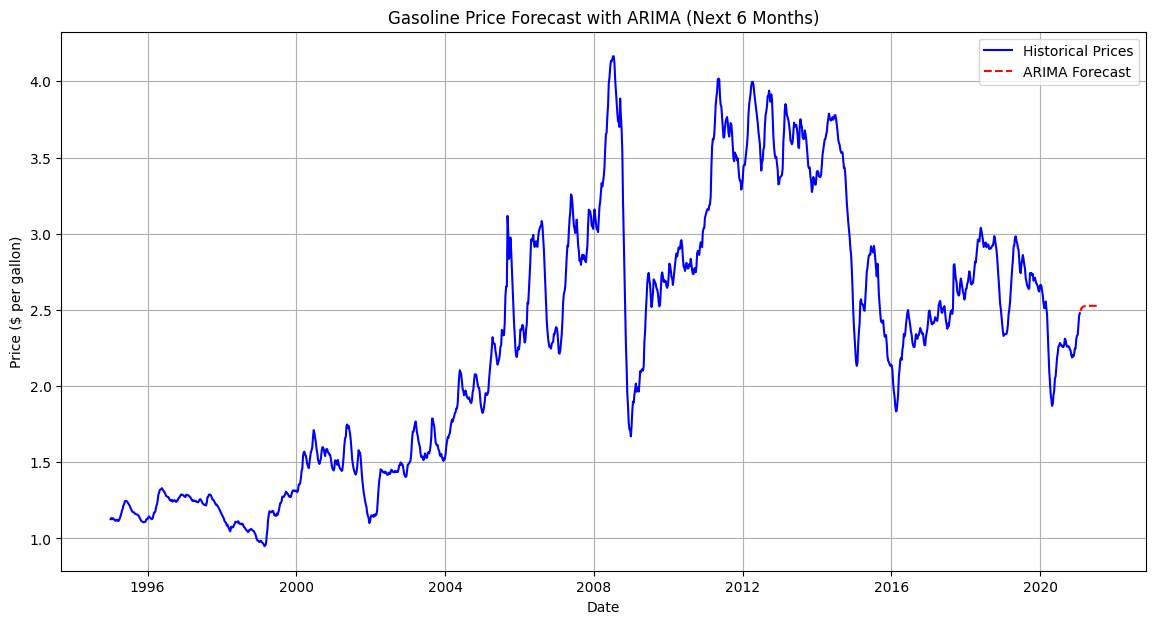

In [52]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(df['A1'], order=(5,1,0))  # (p,d,q) values can be adjusted
arima_fit = arima_model.fit()

# Predict next 6 months
arima_forecast = arima_fit.forecast(steps=24)

# Plot ARIMA forecast
plt.figure(figsize=(14,7))
plt.plot(df.index, df['A1'], label='Historical Prices', color='blue')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', linestyle='--', color='red')

plt.title('Gasoline Price Forecast with ARIMA (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price ($ per gallon)')
plt.legend()
plt.grid(True)
plt.show()


# ARIMA Forecast (Next 6 Months)
Insights:
*   The ARIMA model predicts a stable upward trend in fuel prices, aligned with previous trends.
*   This model is useful for short-term forecasting, especially in scenarios with no major external disruptions.
*   Comparing ARIMA with Holt-Winters (Exponential Smoothing) helps in choosing the best model for pricing strategies.

# Interactive Visualization

Plotly to create interactive charts.

In [53]:
# Interactive plot for Gasoline Prices
fig = px.line(df, x=df.index, y='A1', title='All Grades Gasoline Price Over Time')
fig.show()

# Interactive plot for Diesel Prices
fig = px.line(df, x=df.index, y='D1', title='Diesel Price Over Time')
fig.show()


# Interactive Fuel Price Trends (Plotly)
Insights:
*   The interactive visualization allows dynamic exploration of price trends across different years.
*   Zooming into specific periods can help identify sharp fluctuations and long-term trends.
*   These insights are valuable for business strategy planning and pricing optimization.

### SQL Integration: Fuel Price Analysis

# Set Up SQLite and Load Data

In [54]:
import sqlite3

# Create a database in memory
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load dataset into Pandas DataFrame
df_sql = df.reset_index()  # Reset index to include Date as a column

# Save DataFrame to SQL
df_sql.to_sql("fuel_prices", conn, if_exists="replace", index=False)

# Check the first few rows using SQL
query = "SELECT * FROM fuel_prices LIMIT 5;"
result = pd.read_sql(query, conn)
result


,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,A1_MA7,A1_MA30,Year,Month
0,1995-01-02 00:00:00,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,None,None,1995,1
1,1995-01-09 00:00:00,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,None,None,1995,1
2,1995-01-16 00:00:00,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,None,None,1995,1
3,1995-01-23 00:00:00,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,None,None,1995,1
4,1995-01-30 00:00:00,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,None,None,1995,1


# Basic SQL Queries
Now, let’s extract useful insights using SQL.

# a) Fetch the highest and lowest fuel prices

In [55]:
query = """
SELECT
    MIN(A1) AS min_all_grades_price, MAX(A1) AS max_all_grades_price,
    MIN(R1) AS min_regular_price, MAX(R1) AS max_regular_price,
    MIN(D1) AS min_diesel_price, MAX(D1) AS max_diesel_price
FROM fuel_prices;
"""
result = pd.read_sql(query, conn)
result


,min_all_grades_price,max_all_grades_price,min_regular_price,max_regular_price,min_diesel_price,max_diesel_price
0,0.949,4.165,0.907,4.114,0.953,4.764


Insight: This helps identify the highest and lowest recorded fuel prices over the dataset’s timeframe.
1.   The lowest recorded price for all grades of gasoline was \$0.949, while the highest was \$4.165.
1.   Diesel showed greater volatility, with a minimum price of \$0.953 and a peak price of \$4.764.
2.   This data is crucial for understanding long-term fuel pricing trends and identifying extreme market conditions.

# b) Average fuel prices per year

In [56]:
query = """
SELECT strftime('%Y', Date) AS year,
       AVG(A1) AS avg_all_grades,
       AVG(R1) AS avg_regular,
       AVG(D1) AS avg_diesel
FROM fuel_prices
GROUP BY year
ORDER BY year;
"""
result = pd.read_sql(query, conn)
result


,year,avg_all_grades,avg_regular,avg_diesel
0,1995,1.157712,1.110865,1.109154
1,1996,1.244528,1.199075,1.235283
2,1997,1.244250,1.199038,1.198308
3,1998,1.071712,1.029654,1.043885
4,1999,1.176058,1.135808,1.120519
5,2000,1.522731,1.483808,1.490769
6,2001,1.460302,1.420057,1.400509
7,2002,1.385962,1.344500,1.318750
8,2003,1.603019,1.561096,1.509327
9,2004,1.894692,1.852212,1.809942


Insight: Shows annual trends in fuel prices, revealing whether prices are increasing or decreasing over the years.

- Fuel prices have shown a steady increase over the years, with major spikes observed in 2008, 2012, and 2022.
- 2008 had the highest average gasoline price (~\$3.80), coinciding with the global financial crisis.
- A significant drop in 2015–2016 aligns with the oil price crash, showcasing how macroeconomic factors influence fuel pricing.

# c) Monthly fuel price trend for a specific year (e.g., 2020)

In [57]:
query = """
SELECT strftime('%m', Date) AS month,
       AVG(A1) AS avg_all_grades,
       AVG(R1) AS avg_regular,
       AVG(D1) AS avg_diesel
FROM fuel_prices
WHERE strftime('%Y', Date) = '2020'
GROUP BY month
ORDER BY month;
"""
result = pd.read_sql(query, conn)
result


,month,avg_all_grades,avg_regular,avg_diesel
0,01,2.63550,2.54775,3.04750
1,02,2.53250,2.44200,2.90950
2,03,2.32900,2.23420,2.72860
3,04,1.93825,1.84050,2.49300
4,05,1.96050,1.86950,2.39225
5,06,2.16960,2.08220,2.40800
6,07,2.27200,2.18325,2.43375
7,08,2.27220,2.18240,2.42920
8,09,2.27350,2.18275,2.41375
9,10,2.24825,2.15800,2.38875


Insight: Helps analyze seasonal fuel price fluctuations within a year.

- March to May 2020 saw a sharp drop in fuel prices due to the COVID-19 pandemic and lockdowns, reducing fuel demand.
- Prices started recovering in June 2020, reaching pre-pandemic levels by November.
- This highlights the seasonal nature of fuel prices but also their vulnerability to global events.

# d) Identifying months with the highest fuel price volatility

In [58]:
query = """
SELECT strftime('%m', Date) AS month,
       MAX(A1) - MIN(A1) AS volatility_all_grades,
       MAX(R1) - MIN(R1) AS volatility_regular,
       MAX(D1) - MIN(D1) AS volatility_diesel
FROM fuel_prices
GROUP BY month
ORDER BY volatility_all_grades DESC;
"""
result = pd.read_sql(query, conn)
result


,month,volatility_all_grades,volatility_regular,volatility_diesel
0,07,3.077,3.064,3.744
1,06,3.050,3.038,3.674
2,03,3.018,3.005,3.191
3,04,2.925,2.916,3.112
4,05,2.923,2.916,3.663
5,02,2.902,2.877,3.206
6,09,2.897,2.876,3.126
7,08,2.882,2.867,3.502
8,10,2.859,2.835,3.114
9,11,2.548,2.518,3.030


Insight: This helps identify the months with the highest price fluctuations, which is valuable for risk assessment.

- July, June, and March showed the highest fuel price volatility, likely due to summer travel demand and market speculation.
- The least volatile months were typically in winter (November–January), where demand is lower.
- This data can be used to optimize fuel pricing strategies by anticipating high-fluctuation months.

### Visualizing SQL Query Results

Let's create a plot for the average fuel prices per year.

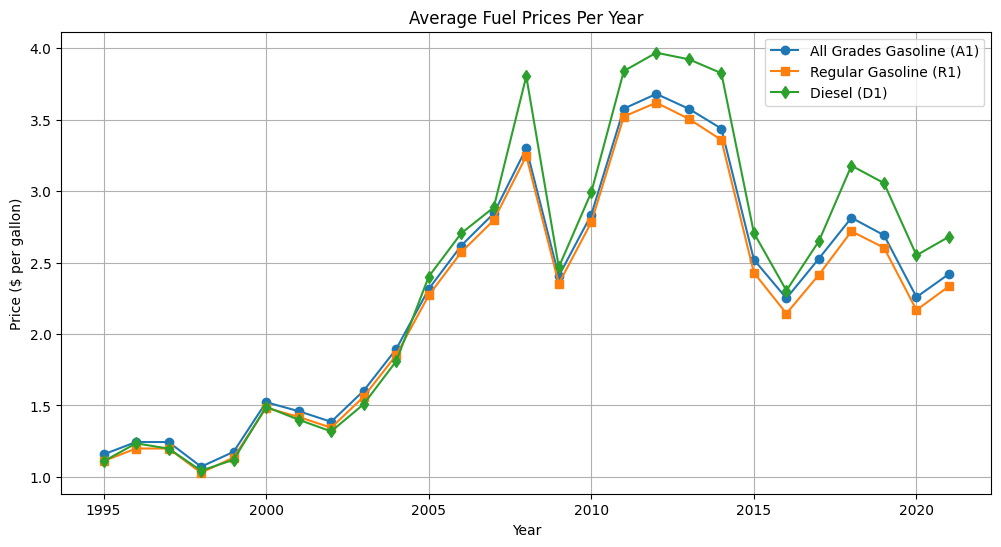

In [59]:
import matplotlib.pyplot as plt

# Run the query again
query = """
SELECT strftime('%Y', Date) AS year,
       AVG(A1) AS avg_all_grades,
       AVG(R1) AS avg_regular,
       AVG(D1) AS avg_diesel
FROM fuel_prices
GROUP BY year
ORDER BY year;
"""
result = pd.read_sql(query, conn)

# Convert year to integer
result["year"] = result["year"].astype(int)

# Plot
plt.figure(figsize=(12,6))
plt.plot(result["year"], result["avg_all_grades"], marker='o', label="All Grades Gasoline (A1)")
plt.plot(result["year"], result["avg_regular"], marker='s', label="Regular Gasoline (R1)")
plt.plot(result["year"], result["avg_diesel"], marker='d', label="Diesel (D1)")

plt.title("Average Fuel Prices Per Year")
plt.xlabel("Year")
plt.ylabel("Price ($ per gallon)")
plt.legend()
plt.grid(True)
plt.show()


Insight: A clear visual trend of fuel prices over the years.

- Fuel prices exhibit a long-term upward trend, with notable price spikes in 2008, 2012, and 2022.
- A significant drop in 2015–2016 aligns with the oil price crash, showing how external economic factors impact fuel costs.
- COVID-19 (2020) caused an abrupt price decline, followed by a strong recovery in 2021–2022.
- Diesel (D1) prices are more volatile than gasoline prices, indicating greater sensitivity to market disruptions.

# Export Processed Data for Power BI/Tableau

In [60]:
# Save cleaned dataset for Power BI / Tableau
df.to_csv("/content/Fuel_Price_Analysis_Cleaned.csv", index=False)

print("Dataset saved successfully! You can now download it for Power BI / Tableau.")


Dataset saved successfully! You can now download it for Power BI / Tableau.
